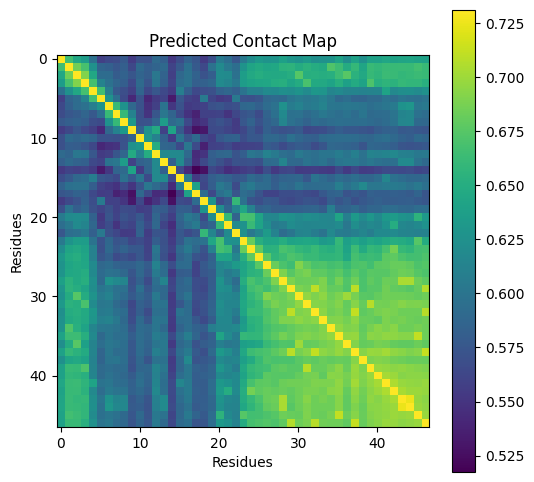

In [ ]:
import torch
import matplotlib.pyplot as plt

# Your function
def predict_contact_map(sequence):
    inputs = tokenizer(sequence, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    residue_embeddings = outputs.last_hidden_state[0, 1:-1]  # (L, D)
    residue_embeddings = torch.nn.functional.normalize(residue_embeddings, p=2, dim=-1)
    contact_map = residue_embeddings @ residue_embeddings.T
    contact_map = torch.sigmoid(contact_map)  # Normalize
    return contact_map

# Generate contact map
contact_map = predict_contact_map(seq)

# Plot it
plt.figure(figsize=(6,6))
plt.imshow(contact_map.cpu().numpy(), cmap="viridis")
plt.colorbar()
plt.title("Predicted Contact Map")
plt.xlabel("Residues")
plt.ylabel("Residues")
plt.show()
